In [13]:
import numpy as np
import networkx as nx

#generalised laplacian matrix using social distance approach
def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

In [14]:
import networkx as nx
import numpy as np
import itertools 

#function to compute k-path transformed laplacian based on the laplace 
#transform with lambda parameter
def Genlaplacian_laplace(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [15]:
#function to compute k-path transformed laplacian based on the mellin
#transform with s parameter
def Genlaplacian_mellin(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [16]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools

inter = 50                                              #number of realisations
rand_lst = [random.randint(1, 10) for i in range(0,10)] #set intitial heat content, phi_0 by random values

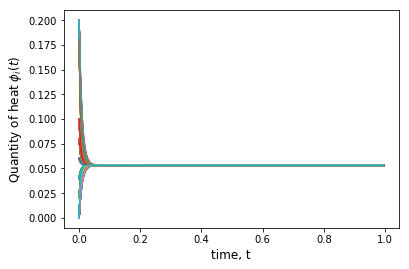

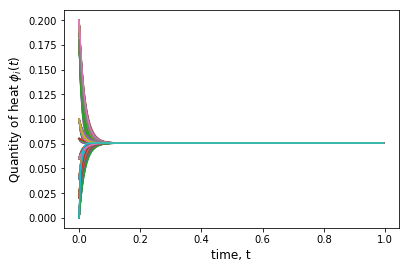

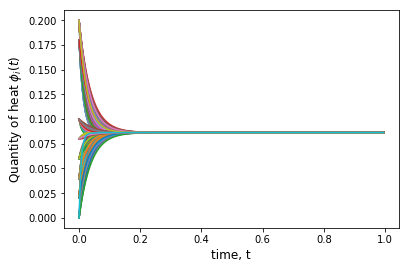

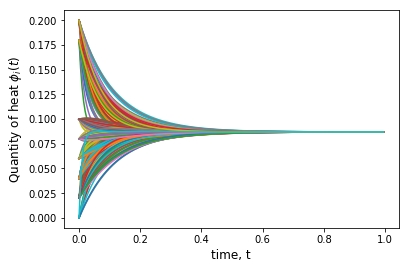

In [27]:
###Mellin transform diffusion for Barabasi network####
n=500
m=2

time = np.arange(0,1,0.005)
nt = len(time)
data_arr = np.zeros((inter,nt,n))
pt_len =[]
av_lst=[]

s_results = []

G_lst = []                              # list of generated graphs

for i in range(0,inter):
    G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m, seed=None)
    G_lst.append(G)
    
    
#print(nx.average_shortest_path_length(G))

s_lst =[1,1.5,2,3]                            #list of s values for mellin

phi_0 = [0]*n

for s in s_lst:    
    for G in G_lst:
        g=0
        #deg = list(G.degree)
        #avedegree = np.mean([d[1] for d in deg])          # compute average degree
        #av_lst.append(avedegree)

        L = Genlaplacian_mellin(G,s)   # to cater for no longrange interactions
        D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
        D = np.reshape(D,(n,1), order='F')

        j=0
        for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
            phi_0[r] = rand_lst[j]
            j = j+1

        phi_0 = np.reshape(phi_0,(n,1), order='F');
        phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

        #plotting results
        phi_lst=[]   
        tt=0
        for t in time :                             #Loop through times and decay each initial component
            Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
            Phi = np.dot(V,Phi);  
            #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
            data_arr[g,tt]= (Phi.ravel()).tolist()
            tt = tt+1
        g=g+1 

        ln = len(data_arr)
        sum_arr = np.zeros((nt,n))
        for k in range(ln):
            sum_arr = sum_arr + data_arr[k]
        sum_av = np.multiply(sum_arr,(1.0/inter))
    s_results.append(sum_av)

for s_res in s_results:
    plt.plot(time,s_res.tolist())
    plt.xlabel('time, t', fontsize=12)
    plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
    #plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
    #plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-degreesource.eps', format='eps', dpi=1000)
    plt.show()

In [ ]:
### Diffusiion of Barabasi network with Laplace tranforms ####

time = np.arange(0,10,0.005)
nt = len(time)
data_arr = np.zeros((inter,nt,n))
pt_len =[]
av_lst=[]

s_results = []


lam_lst =[1,1.5,2,3]                            #list of s values for mellin

phi_0 = [0]*n

for lam in lam_lst:    
    for G in G_lst:
        g=0
        #deg = list(G.degree)
        #avedegree = np.mean([d[1] for d in deg])          # compute average degree
        #av_lst.append(avedegree)

        L = Genlaplacian_laplace(G,lam)   # to cater for no longrange interactions
        D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
        D = np.reshape(D,(n,1), order='F')

        j=0
        for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
            phi_0[r] = rand_lst[j]
            j = j+1

        phi_0 = np.reshape(phi_0,(n,1), order='F');
        phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

        #plotting results
        phi_lst=[]   
        tt=0
        for t in time :                             #Loop through times and decay each initial component
            Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
            Phi = np.dot(V,Phi);  
            #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
            data_arr[g,tt]= (Phi.ravel()).tolist()
            tt = tt+1
        g=g+1 

        ln = len(data_arr)
        sum_arr = np.zeros((nt,n))
        for k in range(ln):
            sum_arr = sum_arr + data_arr[k]
        sum_av = np.multiply(sum_arr,(1.0/inter))
    s_results.append(sum_av)

for s_res in s_results:
    plt.plot(time,s_res.tolist())
    plt.xlabel('time, t', fontsize=12)
    plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
    #plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
    #plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-degreesource.eps', format='eps', dpi=1000)
    plt.show()

In [ ]:
###Mellin transform diffusion for ER network####
n=500
p=0.012

time = np.arange(0,1,0.005)
nt = len(time)
data_arr = np.zeros((inter,nt,n))
pt_len =[]
av_lst=[]

s_results = []

G_lst = []                              # list of generated graphs

for i in range(0,inter):
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create ER network
    while (nx.is_connected(G)==False):                           # check if network is connected
        G = nx.gnp_random_graph(n, p, seed=None, directed=False)
    G_lst.append(G)
    
    
#print(nx.average_shortest_path_length(G))

s_lst =[1,1.5,2,3]                            #list of s values for mellin

phi_0 = [0]*n

for s in s_lst:    
    for G in G_lst:
        g=0
        #deg = list(G.degree)
        #avedegree = np.mean([d[1] for d in deg])          # compute average degree
        #av_lst.append(avedegree)

        L = Genlaplacian_mellin(G,s)   # to cater for no longrange interactions
        D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
        D = np.reshape(D,(n,1), order='F')

        j=0
        for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
            phi_0[r] = rand_lst[j]
            j = j+1

        phi_0 = np.reshape(phi_0,(n,1), order='F');
        phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

        #plotting results
        phi_lst=[]   
        tt=0
        for t in time :                             #Loop through times and decay each initial component
            Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
            Phi = np.dot(V,Phi);  
            #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
            data_arr[g,tt]= (Phi.ravel()).tolist()
            tt = tt+1
        g=g+1 

        ln = len(data_arr)
        sum_arr = np.zeros((nt,n))
        for k in range(ln):
            sum_arr = sum_arr + data_arr[k]
        sum_av = np.multiply(sum_arr,(1.0/inter))
    s_results.append(sum_av)

for s_res in s_results:
    plt.plot(time,s_res.tolist())
    plt.xlabel('time, t', fontsize=12)
    plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
    #plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
    #plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-degreesource.eps', format='eps', dpi=1000)
    plt.show()

In [ ]:
### Diffusiion of Barabasi network with Laplace tranforms ####

time = np.arange(0,10,0.005)
nt = len(time)
data_arr = np.zeros((inter,nt,n))
pt_len =[]
av_lst=[]

s_results = []


lam_lst =[1,1.5,2,3]                            #list of s values for mellin

phi_0 = [0]*n

for lam in lam_lst:    
    for G in G_lst:
        g=0
        #deg = list(G.degree)
        #avedegree = np.mean([d[1] for d in deg])          # compute average degree
        #av_lst.append(avedegree)

        L = Genlaplacian_laplace(G,lam)   # to cater for no longrange interactions
        D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
        D = np.reshape(D,(n,1), order='F')

        j=0
        for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
            phi_0[r] = rand_lst[j]
            j = j+1

        phi_0 = np.reshape(phi_0,(n,1), order='F');
        phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

        #plotting results
        phi_lst=[]   
        tt=0
        for t in time :                             #Loop through times and decay each initial component
            Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
            Phi = np.dot(V,Phi);  
            #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
            data_arr[g,tt]= (Phi.ravel()).tolist()
            tt = tt+1
        g=g+1 

        ln = len(data_arr)
        sum_arr = np.zeros((nt,n))
        for k in range(ln):
            sum_arr = sum_arr + data_arr[k]
        sum_av = np.multiply(sum_arr,(1.0/inter))
    s_results.append(sum_av)

for s_res in s_results:
    plt.plot(time,s_res.tolist())
    plt.xlabel('time, t', fontsize=12)
    plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
    #plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
    #plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-degreesource.eps', format='eps', dpi=1000)
    plt.show()